In [16]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from scipy.linalg import eig
from scipy.integrate import RK45
#motor DC
# constantes
J = 1
R = 3.8
L = 0.0037
Ke = 0.2
Kt = 0.2
c = 0.001
Tl = 0.07
V = 1

In [17]:
# Representacion en espacio de estados
A = [[-c/J,Kt/J],[-Ke/L,-R/L]]
l = eig(A)
p1 = l[0][0]
p2 = l[0][1]
print(p1)
print(p2)

(-0.011526433928565893+0j)
(-1027.016500593098+0j)


In [18]:
B=[[-1/J,0],[0,1/L]]
C = [[0,1],[1,0]]
D = [[0,0],[0,0]]
sys = ct.ss(A,B,C,D)

In [19]:
Tsimu = 1/np.abs(p1)*5
sal = ct.step_response(sys,Tsimu)
sal.outputs

array([[[ 0.00000000e+00,  2.24841107e-01,  4.38657318e-01,
          6.41942894e-01,  8.35216477e-01,  1.01897117e+00,
          1.19367578e+00,  1.35977604e+00,  1.51769571e+00,
          1.66783770e+00,  1.81058507e+00,  1.94630201e+00,
          2.07533477e+00,  2.19801255e+00,  2.31464834e+00,
          2.42553972e+00,  2.53096961e+00,  2.63120697e+00,
          2.72650756e+00,  2.81711452e+00,  2.90325900e+00,
          2.98516079e+00,  3.06302885e+00,  3.13706183e+00,
          3.20744863e+00,  3.27436882e+00,  3.33799313e+00,
          3.39848388e+00,  3.45599541e+00,  3.51067445e+00,
          3.56266050e+00,  3.61208619e+00,  3.65907763e+00,
          3.70375469e+00,  3.74623137e+00,  3.78661604e+00,
          3.82501172e+00,  3.86151639e+00,  3.89622316e+00,
          3.92922060e+00,  3.96059289e+00,  3.99042006e+00,
          4.01877822e+00,  4.04573972e+00,  4.07137334e+00,
          4.09574448e+00,  4.11891532e+00,  4.14094497e+00,
          4.16188965e+00,  4.18180278e+0

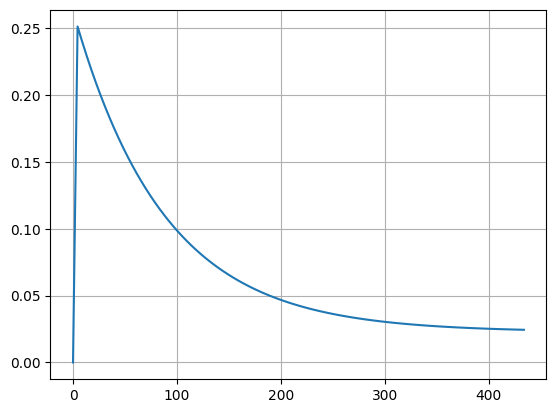

In [20]:
plt.plot(sal.time,sal.outputs[0][1])
plt.grid()

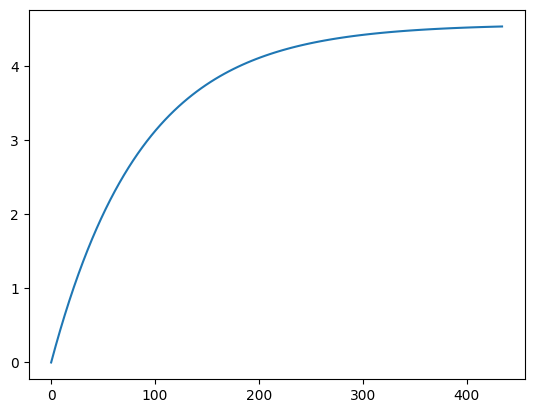

In [21]:
plt.plot(sal.time,sal.outputs[1][1])

In [22]:
# Solucion numerica por Runge Kutta
def f(t,x):
    s=[0,0]
    w = x[0]
    i = x[1]
    s[0]=-c/J*w+Kt/J*i-Tl/J
    s[1]=-Ke/L*w-R/L*i+V/L
    return s
#f(1,[0,0])
sal = RK45(f,0,[0,0],Tsimu)
sal